# 12. 태깅 작업 Tagging Task



### 1) 케라스를 이용한 태깅 작업 개요

양방향 RNN

1. 훈련 데이터 이해

  태깅작업 : 지도학습

2. 시퀀스 레이블링

3. 양방향 LSTM

  model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))

4. RNN의 다-대-다 문제

  return_sequences=True : 출력층에 모든 은닉 상태의 값 보냄

  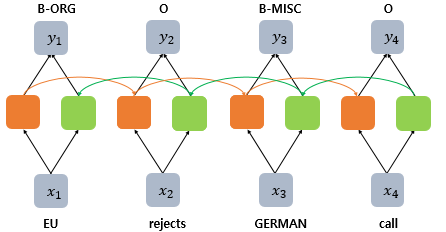

### 2) 양방향 LSTM을 이용한 품사태깅

1. 품사태깅 데이터 이해와 전처리



In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [4]:
tagged_sentences = nltk.corpus.treebank.tagged_sents() # 품사 태깅된 데이터

In [5]:
sentences, pos_tags = [], [] 
for tagged_sentence in tagged_sentences:
    sentence, tag_info = zip(*tagged_sentence)
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장
    pos_tags.append(list(tag_info)) # 각 샘플에서 품사 태깅 정보만 저장

In [6]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)

vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1

In [7]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


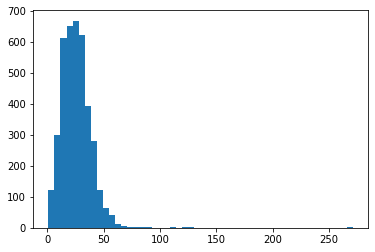

In [14]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [12]:
max_len = 150
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

2. 양방향 LSTM으로 POS Tagger 만들기

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
20/20 [==============================] - 47s 2s/step - loss: 0.6159 - accuracy: 0.1480 - val_loss: 0.5214 - val_accuracy: 0.1406
Epoch 2/7
20/20 [==============================] - 33s 2s/step - loss: 0.5167 - accuracy: 0.1624 - val_loss: 0.4884 - val_accuracy: 0.1860
Epoch 3/7
20/20 [==============================] - 31s 2s/step - loss: 0.4847 - accuracy: 0.2565 - val_loss: 0.4498 - val_accuracy: 0.3630
Epoch 4/7
20/20 [==============================] - 31s 2s/step - loss: 0.4235 - accuracy: 0.4354 - val_loss: 0.3632 - val_accuracy: 0.4883
Epoch 5/7
20/20 [==============================] - 31s 2s/step - loss: 0.3183 - accuracy: 0.5479 - val_loss: 0.2602 - val_accuracy: 0.6302
Epoch 6/7
20/20 [==============================] - 31s 2s/step - loss: 0.2181 - accuracy: 0.7144 - val_loss: 0.1793 - val_accuracy: 0.7650
Epoch 7/7
20/20 [==============================] - 34s 2s/step - loss: 0.1388 - accuracy: 0.8428 - val_loss: 0.1215 - val_accuracy: 0.8479


In [17]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

20/20 [==============================] - 2s 114ms/step - loss: 0.1215 - accuracy: 0.8479

 테스트 정확도: 0.8479


### 3) 개체명 인식 Named Entity Recognition

1. 개체명 인식

  이름을 가진 개체 인식

2. NLTK를 이용한 개체명 인식



In [20]:
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sentence = "James is working at Disney in London"
# 토큰화 후 품사 태깅
tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [23]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

ner_sentence = ne_chunk(tokenized_sentence) # 개체명 인식
print(ner_sentence)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))


### 4) 개체명 인식의 BIO 표현 이해

1. BIO 표현

  해 B-movie

  리 I-movie

  포 I-movie

  터 I-movie

  보 O

  러 O

  메 B-theater

  가 I-theater

  박 I-theater
  
  스 I-theater

  가 O

  자 O

### 5) BiLSTM을 이용한 개체명 인식 Named Entity Recognition, NER


### 6) biLSTM-CRF

  양방향 LSTM은 입력 단어에 대한 양방향 문맥을 반영하며, CRF는 출력 레이블에 대한 양방향 문맥을 반영한다.

  pip install keras-crf
